<a href="https://colab.research.google.com/github/brasilemnumeros/dados/blob/main/caged/CAGED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Novo CAGED

### Estoque de empregos formais - Total

In [1]:
!pip install python-bcb

## Coleta de dados

### Subtask:
Buscar uma fonte confiável de dados históricos.


In [2]:
from bcb import sgs
import pandas as pd
from datetime import datetime, timedelta

# Define the series code for the Novo CAGED - Total (Estoque de empregos formais - Total)
caged_total_code = 28763

# Define the end date as today
end_date = datetime.now()

# Define the start date for the historical period (from 1995-01-01)
start_date_overall = datetime(1995, 1, 1)

# List to store dataframes for each collection period
dfs_caged_total = []

# Define the period length in years for chunking data collection
period_years_caged_total = 10

# Loop through periods backwards from the end date
current_end_date_caged_total = end_date
while current_end_date_caged_total > start_date_overall:
    # Determine the start date for the current period, ensuring it's not before start_date_overall
    current_start_date_caged_total = max(start_date_overall, current_end_date_caged_total - timedelta(days=period_years_caged_total * 365))

    print(f"Attempting to retrieve CAGED Total data from {current_start_date_caged_total.strftime('%Y-%m-%d')} to {current_end_date_caged_total.strftime('%Y-%m-%d')}")

    try:
        # Use the bcb.sgs.get() function to retrieve the series data for the current period
        # Pass the series code as a list of tuples to specify the column name
        df_period_caged_total = sgs.get([('caged_total', caged_total_code)], start=current_start_date_caged_total.strftime('%Y-%m-%d'), end=current_end_date_caged_total.strftime('%Y-%m-%d'))

        if not df_period_caged_total.empty:
            print(f"CAGED Total data retrieved for the period: {current_start_date_caged_total.strftime('%Y-%m-%d')} to {current_end_date_caged_total.strftime('%Y-%m-%d')}")
            dfs_caged_total.append(df_period_caged_total)
        else:
            print(f"No CAGED Total data retrieved for the period: {current_start_date_caged_total.strftime('%Y-%m-%d')} to {current_end_date_caged_total.strftime('%Y-%m-%d')}")

    except Exception as e:
        print(f"An error occurred while retrieving CAGED Total data for the period {current_start_date_caged_total.strftime('%Y-%m-%d')} to {current_end_date_caged_total.strftime('%Y-%m-%d')}: {e}")

    # Set the end date for the next period as the day before the current period's start date
    current_end_date_caged_total = current_start_date_caged_total - timedelta(days=1)

print(f"Collected {len(dfs_caged_total)} dataframes for different CAGED Total periods.")

# Combine all dataframes in the list if the list is not empty
if dfs_caged_total:
    # Concatenate the dataframes and sort the index (dates) to ensure chronological order
    df_caged_total = pd.concat(dfs_caged_total).sort_index()
    print("\nCAGED Total DataFrames combined successfully!")

    print("\nPrimeiras 5 linhas do DataFrame df_caged_total:")
    display(df_caged_total.head())

    print("\nÚltimas 5 linhas do DataFrame df_caged_total:")
    display(df_caged_total.tail())

    print("\nInformações do DataFrame df_caged_total:")
    df_caged_total.info()

else:
    print("The list of CAGED Total DataFrames is empty. No data to combine.")
    df_caged_total = None

# Rename the DataFrame to df for consistency with the rest of the notebook
df = df_caged_total

Attempting to retrieve CAGED Total data from 2015-10-22 to 2025-10-19
CAGED Total data retrieved for the period: 2015-10-22 to 2025-10-19
Attempting to retrieve CAGED Total data from 2005-10-23 to 2015-10-21
CAGED Total data retrieved for the period: 2005-10-23 to 2015-10-21
Attempting to retrieve CAGED Total data from 1995-10-25 to 2005-10-22
CAGED Total data retrieved for the period: 1995-10-25 to 2005-10-22
Attempting to retrieve CAGED Total data from 1995-01-01 to 1995-10-24
CAGED Total data retrieved for the period: 1995-01-01 to 1995-10-24
Collected 4 dataframes for different CAGED Total periods.

CAGED Total DataFrames combined successfully!

Primeiras 5 linhas do DataFrame df_caged_total:


,caged_total
Date,
1995-01-01,22140381
1995-02-01,22210055
1995-03-01,22239692
1995-04-01,22327761
1995-05-01,22419964



Últimas 5 linhas do DataFrame df_caged_total:


,caged_total
Date,
2025-04-01,48101200
2025-05-01,48255017
2025-06-01,48418275
2025-07-01,48557002
2025-08-01,48704360



Informações do DataFrame df_caged_total:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371 entries, 1995-01-01 to 2025-08-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   caged_total  371 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB


## Análise exploratória

### Subtask:
Realizar uma análise inicial dos dados para entender sua estrutura e características.

In [3]:
# Display the first 5 rows of the DataFrame
print("Primeiras 5 linhas do DataFrame df:")
display(df.head())

# Display the last 5 rows of the DataFrame
print("\nÚltimas 5 linhas do DataFrame df:")
display(df.tail())

# Get information about the DataFrame (data types, non-null counts)
print("\nInformações do DataFrame df:")
df.info()

# Generate descriptive statistics for the 'caged_total' column
print("\nEstatísticas Descritivas do Estoque de empregos formais - Total:")
print(df['caged_total'].describe())

# Check the date range of the data
min_date = df.index.min()
max_date = df.index.max()
print(f"\nPeríodo dos dados do Estoque de empregos formais - Total: {min_date.strftime('%Y-%m-%d')} a {max_date.strftime('%Y-%m-%d')}")

Primeiras 5 linhas do DataFrame df:


,caged_total
Date,
1995-01-01,22140381
1995-02-01,22210055
1995-03-01,22239692
1995-04-01,22327761
1995-05-01,22419964



Últimas 5 linhas do DataFrame df:


,caged_total
Date,
2025-04-01,48101200
2025-05-01,48255017
2025-06-01,48418275
2025-07-01,48557002
2025-08-01,48704360



Informações do DataFrame df:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371 entries, 1995-01-01 to 2025-08-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   caged_total  371 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB

Estatísticas Descritivas do Estoque de empregos formais - Total:
count    3.710000e+02
mean     3.292610e+07
std      8.706668e+06
min      2.093705e+07
25%      2.296588e+07
50%      3.471991e+07
75%      3.980354e+07
max      4.870436e+07
Name: caged_total, dtype: float64

Período dos dados do Estoque de empregos formais - Total: 1995-01-01 a 2025-08-01


## Visualização do Estoque de empregos formais - Total

### Subtask:
Criar um gráfico para visualizar a evolução histórica do indicador Estoque de empregos formais - Total ao longo do tempo.

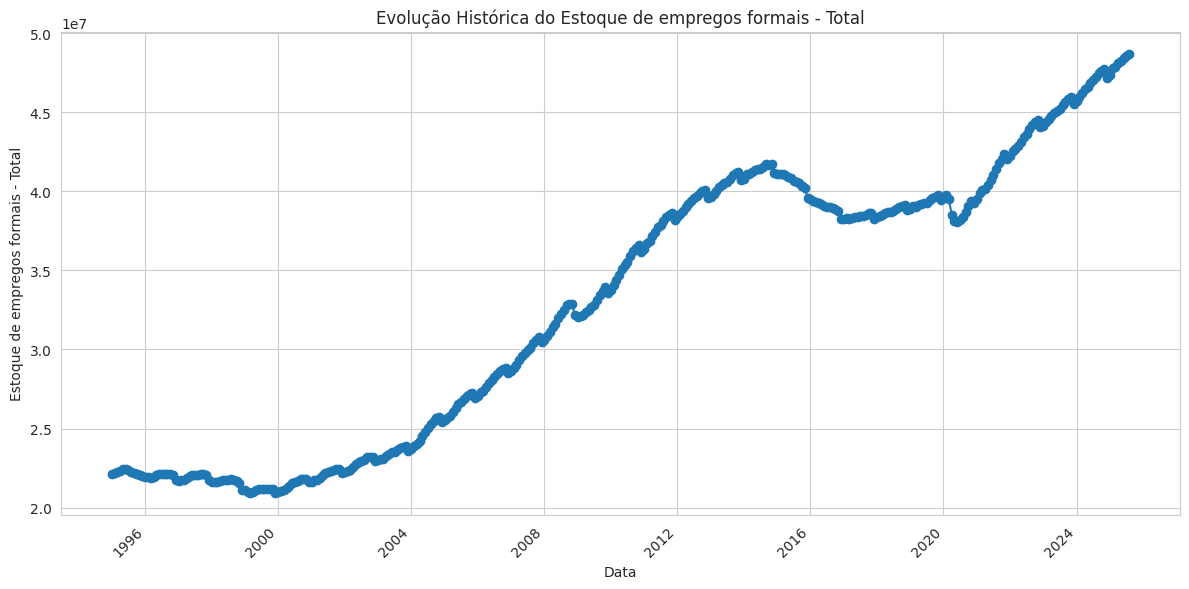

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and an axes for the plot
plt.figure(figsize=(12, 6))
ax = plt.gca() # Get current axes

# Plot the time series of the 'caged_total'
df['caged_total'].plot(ax=ax, marker='o', linestyle='-')

# Add titles and labels
plt.title('Evolução Histórica do Estoque de empregos formais - Total')
plt.xlabel('Data')
plt.ylabel('Estoque de empregos formais - Total')

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

## Salvar dados do MVG-R em json

### Subtask:
Gerar um arquivo JSON com os dados consolidados do indicador MVG-R.

In [5]:
import json

# Create an empty list to store the data points for the JSON output
data_list_caged_total = []

# Iterate through the df DataFrame
for index, row in df.iterrows():
    # Append a dictionary to data_list_caged_total with 'date' and 'value'
    data_list_caged_total.append({
        "date": index.strftime('%Y-%m-%d'),  # Format date as YYYY-MM-DD
        "rate": int(row['caged_total'])  # Use 'caged_total' column
    })

# Create the main dictionary structure for the JSON output
json_output_caged_total = {
    "indicatorName": "Estoque de empregos formais - Total (código 28763)",  # Set the indicator name
    "data": data_list_caged_total  # Include the list of data points
}

# Define the output file path
output_file_path_caged_total = 'caged-total-mensal.json'

# Save the dictionary to a JSON file with indentation for readability
with open(output_file_path_caged_total, 'w') as f:
    json.dump(json_output_caged_total, f, indent=4)

print(f"Dados do Estoque de empregos formais - Total formatados e salvos em '{output_file_path_caged_total}'")

Dados do Estoque de empregos formais - Total formatados e salvos em 'caged-total.json'
